# THEMIS analysis and comparison to reference libraries

## Load THEMIS data

In [1]:
import glob
import pandas as pd

parent_dir = '../data/themis_results'

#  OPEN ALL
# Search for all xlsx files containing 'CSFM' in subdirectories of parent_dir that start with 'I'
csfm_files = glob.glob(f'{parent_dir}/I*/**/*CSFM*.xlsx', recursive=True)
# Search for all xlsx files containing 'WAC' in subdirectories of parent_dir that start with 'I'
wac_files = glob.glob(f'{parent_dir}/I*/**/*WAC*.xlsx', recursive=True)

# Read all the xlsx files into a single DataFrame
csfm_df = pd.concat([pd.read_excel(file) for file in csfm_files], ignore_index=True)
# Read all the xlsx files into a single DataFrame
wac_df = pd.concat([pd.read_excel(file) for file in wac_files], ignore_index=True)
# -------------------------------------------------------------------------------------------------

# # OPEN ONE
# themis_ids_list = ['I09639003', 'I09614002', 'I17888007', 'I18025006']
# themis_id = themis_ids_list[3] # Define the THEMIS ID

# csfm_excel_path = f'/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/{themis_id}/{themis_id}_CSFM_analysis.xlsx'
# wac_excel_path = f'/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/{themis_id}/{themis_id}_WAC_analysis.xlsx'

# # Read the Excel files
# csfm_df = pd.read_excel(csfm_excel_path)
# wac_df = pd.read_excel(wac_excel_path)

# -------------------------------------------------------------------------------------------------


## Combine by category and confidence values

In [2]:
# Remove the confidence level from the Category column in csfm_df
csfm_df['Category'] = csfm_df['Category'].str.replace(r'\s*\(.*\)', '', regex=True)

# Remove the confidence level from the Category column in wac_df
wac_df['Category'] = wac_df['Category'].str.replace(r'\s*\(.*\)', '', regex=True)

## Filter for categories of interest

In [3]:
categories_to_include = ['Type 1 olivine', 'Type 2 olivine', 'hcp + olivine', 'lcp', 'plagioclase']
csfm_df = csfm_df[csfm_df['Category'].isin(categories_to_include)]
wac_df = wac_df[wac_df['Category'].isin(categories_to_include)]
wac_df

,Polygon Index,Category,Average Spectrum,WAC,Number_THEMIS_Pixels
1,57,hcp + olivine,[0.99692226 0.99664041 0.99354231 0.98284112 0...,10.224017,3015
2,69,Type 1 olivine,[1.02206526 1.01418297 0.99354232 0.99152303 0...,10.510666,5346
3,74,Type 1 olivine,[1.01247572 1.01190839 0.9935425 0.9891675 0...,10.331823,621
4,75,lcp,[0.9968446 0.99577483 0.99354227 0.98849176 0...,10.322156,639
5,76,lcp,[1.014111 1.00746973 0.99354241 0.97753032 0...,9.986533,3978
...,...,...,...,...,...
131,35,hcp + olivine,[0.99675782 0.99804785 0.9937474 0.97683941 0...,10.191579,11691
132,46,hcp + olivine,[0.99629235 1.00597415 0.99371005 0.96903869 0...,10.122321,1305
133,49,hcp + olivine,[0.99727192 0.99824739 0.99377233 0.97114743 0...,10.148862,1521
134,243,Type 2 olivine,[0.91408357 0.95357624 0.99317238 0.96645427 0...,9.987600,18


## Load reference data

In [13]:
data_path = '../data/themis_results/ref_wac_csfm_classified.xlsx'
merged_ref_df = pd.read_excel(data_path, sheet_name='ref_wac_csfm_classified')

## Make Plots

### Reference data with patches

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_61446/3273378186.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(hull_points, alpha=0.4, color=color, edgecolor=color, linewidth=1)


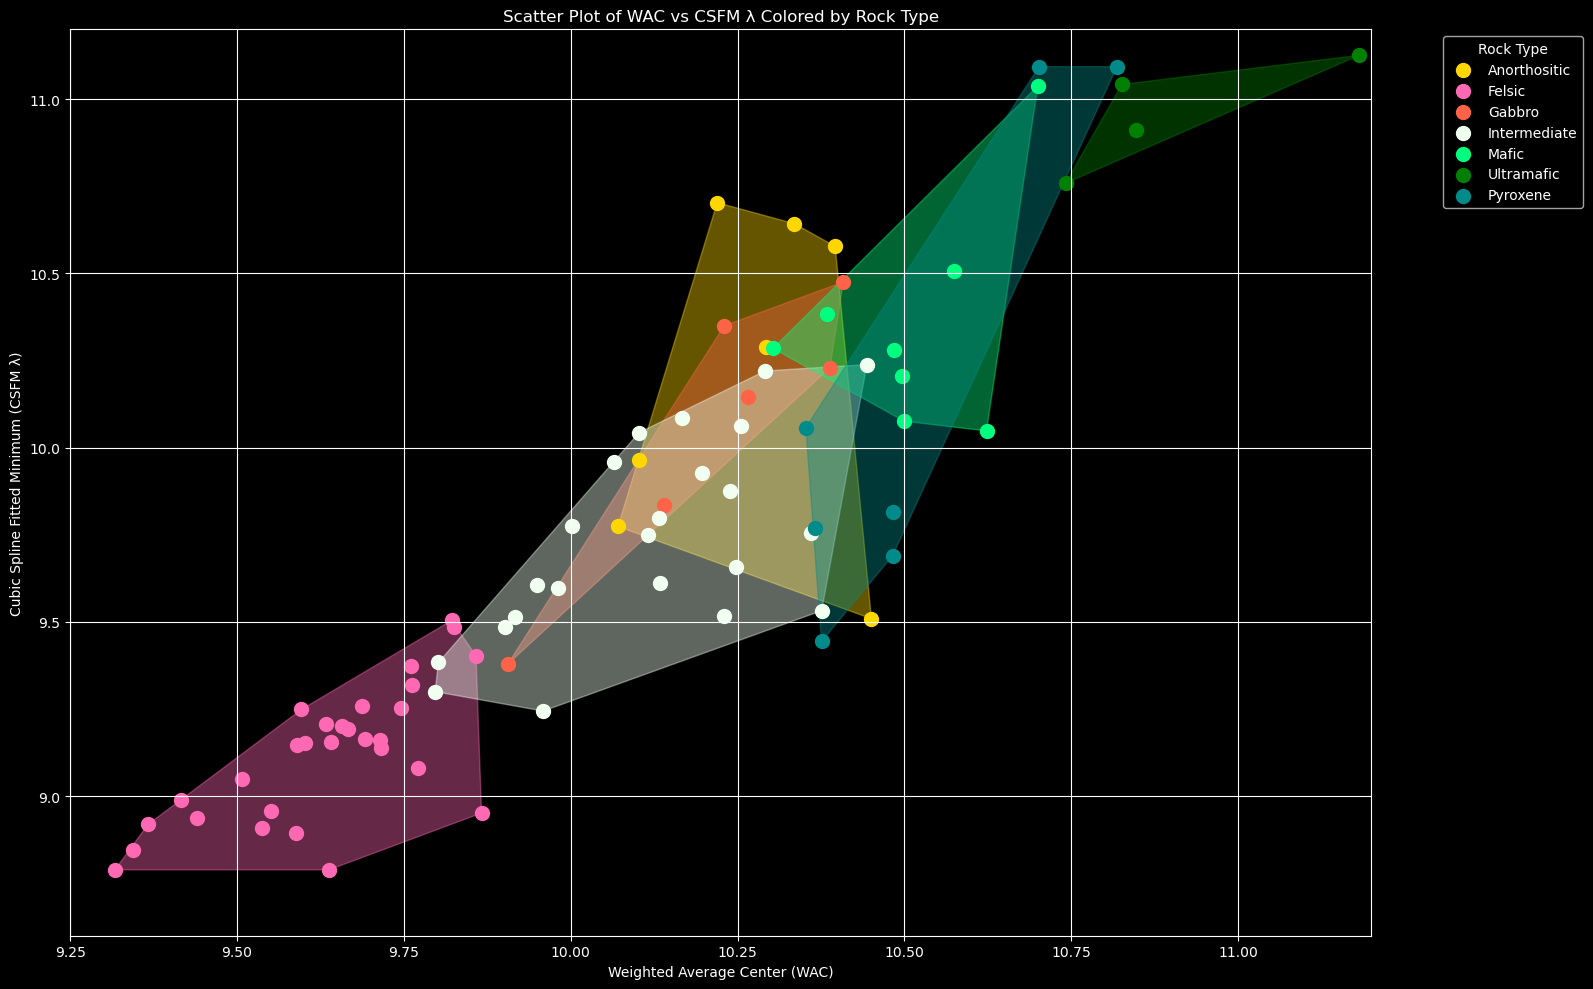

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull

# Optional dark theme
plt.style.use('dark_background')

categories = merged_ref_df['rock type']
colors = merged_ref_df['Color']
wac_values = merged_ref_df['WAC']
csfm_values = merged_ref_df['CSFM λ']

# Create a scatter plot with points colored by rock type
plt.figure(figsize=(16, 10))

# Add a 1:1 dashed line
min_val = max(merged_ref_df['WAC'].min(), merged_ref_df['CSFM λ'].min())
max_val = min(merged_ref_df['WAC'].max(), merged_ref_df['CSFM λ'].max())
# plt.plot([min_val, max_val], [min_val, max_val], '--', label='1:1 Line', color='gray')

# Get unique rock types and process them
unique_rock_types_df = merged_ref_df[['rock type', 'Color']].drop_duplicates().reset_index(drop=True)

# First, draw convex hull patches for each rock type
for _, row in unique_rock_types_df.iterrows():
    rock_type = row['rock type']
    color = row['Color']
    
    # Filter data for this rock type
    rock_data = merged_ref_df[merged_ref_df['rock type'] == rock_type]
    
    if len(rock_data) >= 3:  # Need at least 3 points for a convex hull
        # Get coordinates for this rock type
        points = np.column_stack((rock_data['WAC'], rock_data['CSFM λ']))
        
        # Calculate convex hull
        hull = ConvexHull(points)
        
        # Get hull vertices
        hull_points = points[hull.vertices]
        
        # Create polygon patch with transparency
        polygon = Polygon(hull_points, alpha=0.4, color=color, edgecolor=color, linewidth=1)
        
        # Add patch to plot
        plt.gca().add_patch(polygon)
    elif len(rock_data) == 2:
        # For 2 points, create a slightly expanded line
        x = rock_data['WAC'].values
        y = rock_data['CSFM λ'].values
        # Add some padding to make it visible
        dx = (x[1] - x[0]) * 0.05
        dy = (y[1] - y[0]) * 0.05
        expanded_x = [x[0]-dx, x[1]+dx]
        expanded_y = [y[0]-dy, y[1]+dy]
        plt.fill(expanded_x, expanded_y, color=color, alpha=0.2)

# Now plot the individual points on top
unique_rock_types_set = set()
for rock_type, color, wac, csfm in zip(categories, colors, wac_values, csfm_values):
    if rock_type not in unique_rock_types_set:
        plt.scatter(wac, csfm, label=rock_type, color=color, s=100)
        unique_rock_types_set.add(rock_type)
    else:
        plt.scatter(wac, csfm, color=color, s=100)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Rock Type')
plt.xlabel('Weighted Average Center (WAC)')
plt.ylabel('Cubic Spline Fitted Minimum (CSFM λ)')
plt.xlim(9.25, 11.2)
plt.ylim(8.6, 11.2)
plt.title('Scatter Plot of WAC vs CSFM λ Colored by Rock Type')
plt.grid(True)
plt.tight_layout()

# # save plot as svg
# plt.savefig('/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/wac_csfm_ref_scatter_plot_patches.svg', format='svg', dpi=300)

plt.show()

### THEMIS data with patches from ref data 

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_61446/3073307718.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(hull_points, alpha=0.4, color=color, edgecolor=color, linewidth=1)


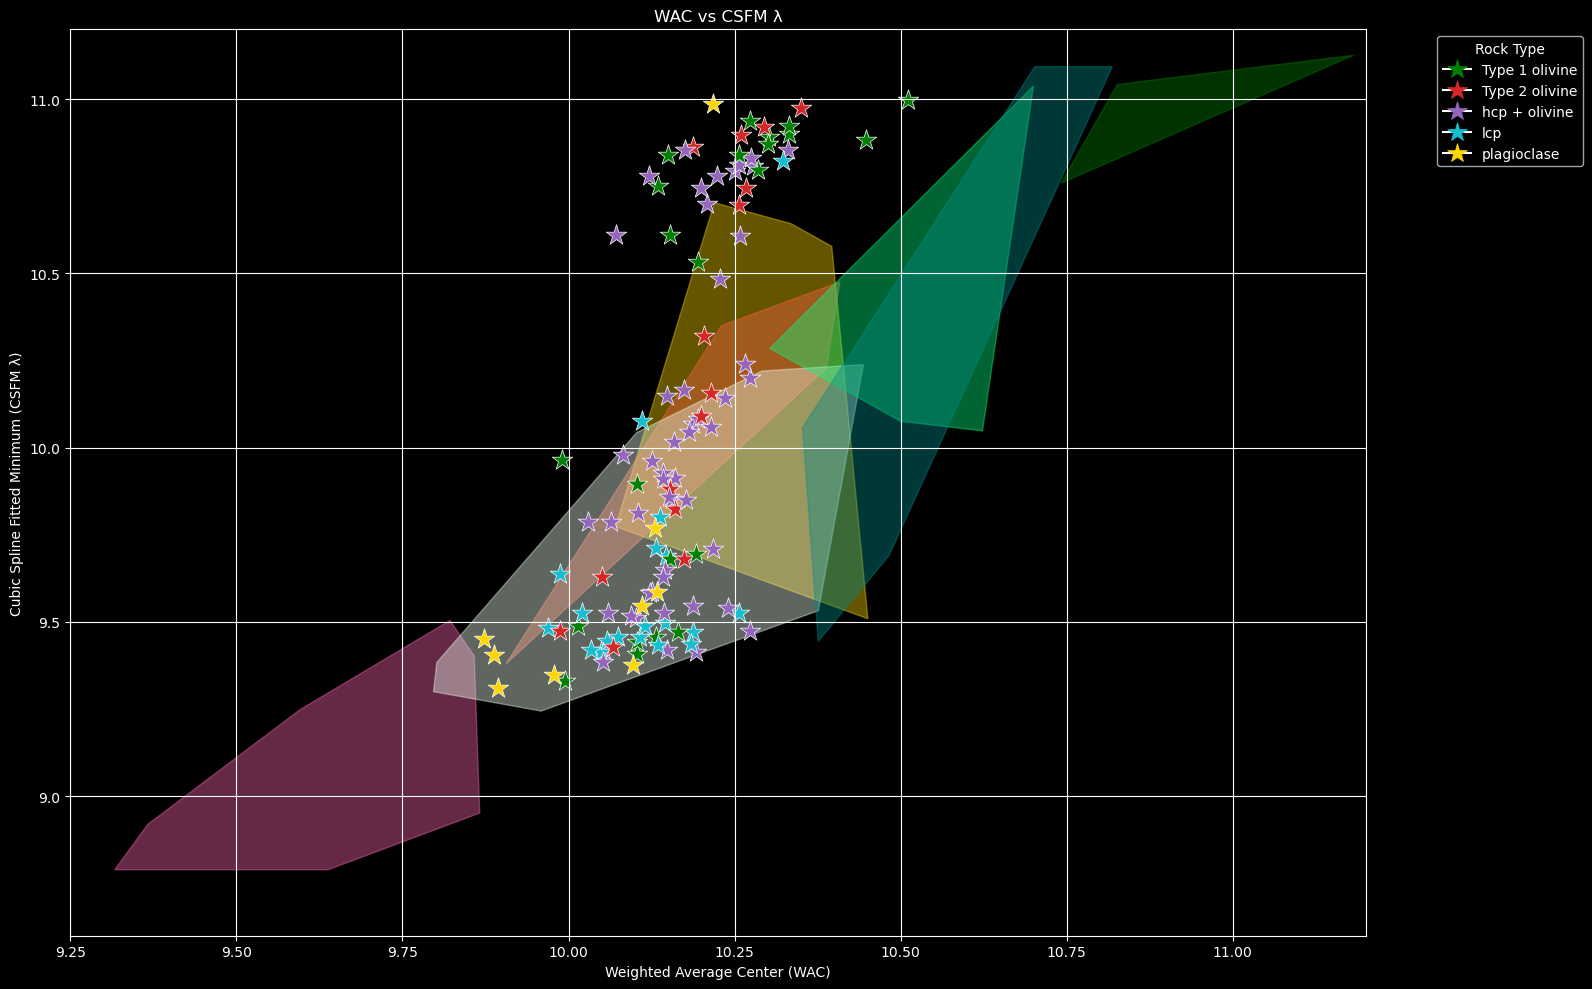

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull

plt.style.use('dark_background')

# Define category colors
cat_color = {
    'Type 1 olivine': 'green',
    'Type 2 olivine': 'tab:red',
    'hcp + olivine': 'tab:purple',
    'lcp': 'tab:cyan',
    'plagioclase': 'gold',
}

# Create a scatter plot with points colored by rock type
plt.figure(figsize=(16, 10))

# First, draw convex hull patches from the reference data
ref_categories = merged_ref_df['rock type']
ref_colors = merged_ref_df['Color']
ref_wac_values = merged_ref_df['WAC']
ref_csfm_values = merged_ref_df['CSFM λ']

# Get unique rock types from reference data
unique_rock_types_df = merged_ref_df[['rock type', 'Color']].drop_duplicates().reset_index(drop=True)

# Draw convex hull patches for each reference rock type
for _, row in unique_rock_types_df.iterrows():
    rock_type = row['rock type']
    color = row['Color']
    
    # Filter data for this rock type
    rock_data = merged_ref_df[merged_ref_df['rock type'] == rock_type]
    
    if len(rock_data) >= 3:  # Need at least 3 points for a convex hull
        # Get coordinates for this rock type
        points = np.column_stack((rock_data['WAC'], rock_data['CSFM λ']))
        
        # Calculate convex hull
        hull = ConvexHull(points)
        
        # Get hull vertices
        hull_points = points[hull.vertices]
        
        # Create polygon patch with transparency
        polygon = Polygon(hull_points, alpha=0.4, color=color, edgecolor=color, linewidth=1)
        
        # Add patch to plot
        plt.gca().add_patch(polygon)
    elif len(rock_data) == 2:
        # For 2 points, create a slightly expanded line
        x = rock_data['WAC'].values
        y = rock_data['CSFM λ'].values
        # Add some padding to make it visible
        dx = (x[1] - x[0]) * 0.05
        dy = (y[1] - y[0]) * 0.05
        expanded_x = [x[0]-dx, x[1]+dx]
        expanded_y = [y[0]-dy, y[1]+dy]
        plt.fill(expanded_x, expanded_y, color=color, alpha=0.4)

# Now plot the points from wac_df and csfm_df
# wac_df and csfm_df can be matched on Polygon Index
# Sort wac_df so that rows with 'plagioclase' in the 'Category' column are at the bottom
wac_df = wac_df.sort_values(by='Category', key=lambda col: col == 'plagioclase')
for index, wac_row in wac_df.iterrows():
    category = wac_row['Category']
    wac_value = wac_row['WAC']
    
    # Find corresponding CSFM value in csfm_df
    csfm_row = csfm_df[csfm_df['Polygon Index'] == wac_row['Polygon Index']].iloc[0]
    csfm_value = csfm_row['CSFM λ']
    
    # Get color from category
    color = cat_color.get(category, 'black')  # Default to black if category not in cat_color
    
    # Plot point
    plt.scatter(wac_value, csfm_value, color=color, s=240, marker='*', edgecolors='white', linewidths=0.5)

# Add legend for the new categories (make sure each appears only once)
handles = []
labels = []
for category, color in cat_color.items():
    handles.append(plt.Line2D([0], [0], marker='*', markerfacecolor=color, 
                             markersize=15, markeredgecolor=color, markeredgewidth=0.5))
    labels.append(category)

# Add a 1:1 dashed line
all_min_val = min(
    merged_ref_df['WAC'].min(),
    merged_ref_df['CSFM λ'].min(),
    wac_df['WAC'].min(),
    csfm_df['CSFM λ'].min()
)
all_max_val = max(
    merged_ref_df['WAC'].max(),
    merged_ref_df['CSFM λ'].max(),
    wac_df['WAC'].max(),
    csfm_df['CSFM λ'].max()
)

## Plot a 1:1 line for reference
# plt.plot([all_min_val, all_max_val], [all_min_val, all_max_val], '--', color='gray')

# Add legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='Rock Type')
plt.xlabel('Weighted Average Center (WAC)')
plt.xlim(9.25, 11.2)
plt.ylim(8.6, 11.2)
plt.ylabel('Cubic Spline Fitted Minimum (CSFM λ)')
plt.title('WAC vs CSFM λ')
plt.grid(True)
plt.tight_layout()

## Save plot as svg
# plt.savefig('/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/wac_csfm_combined_plot_with_ref_patches_updated_1to1_line.svg', format='svg', dpi=300)
# plt.savefig('/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/wac_csfm_combined_plot_with_ref_patches_updated.png', format='png', dpi=300)

plt.show()

I'm not completely happy with the THEMIS data. I think there are some issues with the ~10.17 µm band – maybe residuals from the atmospheric correction. Below I explore simply removing the 10.17 µm band and re-running the analyses. These results are not included in the manuscript because I'm not sure simply removing this band is defensible, but - in my opinion - the below reults more accurately represent the compositions explored in this study.

# Create THEMIS band passes df

In [9]:
import pandas as pd

# Define the data for the table
themis_band_passes = {
    "Band Numbers": ["IR-1", "IR-2", "IR-3", "IR-4", "IR-5", "IR-6", "IR-7", "IR-8", "IR-9", "IR-10"],
    "Center (µm)": [6.77, 6.77, 7.89, 8.51, 9.30, 10.17, 10.99, 11.75, 12.56, 14.88],
    "FWHM (µm)": [1.01, 1.01, 1.09, 1.16, 1.20, 1.10, 1.19, 1.07, 0.81, 0.87]
}

# Create the DataFrame
themis_band_passes_df = pd.DataFrame(themis_band_passes)

# Display the DataFrame
themis_band_passes_df

,Band Numbers,Center (µm),FWHM (µm)
0,IR-1,6.77,1.01
1,IR-2,6.77,1.01
2,IR-3,7.89,1.09
3,IR-4,8.51,1.16
4,IR-5,9.30,1.20
5,IR-6,10.17,1.10
6,IR-7,10.99,1.19
7,IR-8,11.75,1.07
8,IR-9,12.56,0.81
9,IR-10,14.88,0.87


## Calculate WAC without 10.17 µm band

In [10]:
# calculate the wac values again using the Average Spectrum column in the wac_df

themis_band_passes_df['Center (µm)'].iloc[2:-1]
wac_df['Average Spectrum'].iloc[0]
# wac_df


# Define the updated wavelength values excluding the index 3 (10.17 µm)
updated_wavelengths = themis_band_passes_df['Center (µm)'].iloc[2:-1].drop(5).values

# Recalculate WAC values
updated_wac_values = []

for spectrum in wac_df['Average Spectrum']:
    # Convert the spectrum string to a numpy array and slice [2:-1], then exclude index 3
    spectrum_values = np.fromstring(spectrum[1:-1], sep=' ')[2:]
    updated_spectrum_values = np.delete(spectrum_values, 3)  # Adjust index for slicing [2:-1]
    
    # Calculate absorption (1 - emissivity)
    absorption = 1.0 - updated_spectrum_values
    
    # Calculate total absorption
    total_absorption = np.sum(absorption)
    
    if total_absorption > 0:
        # Calculate WAC as the weighted mean of the wavelengths
        wac = np.sum(updated_wavelengths * absorption) / total_absorption
    else:
        wac = np.nan  # Handle cases with no absorption
    
    updated_wac_values.append(wac)

# Add the recalculated WAC values to the DataFrame
wac_df['Updated WAC'] = updated_wac_values


## Calculate CSFM without 10.17 µm band

In [11]:
from scipy.interpolate import CubicSpline
import numpy as np

updated_wavelengths = themis_band_passes_df['Center (µm)'].iloc[2:-1].drop(5).values

# Recalculate CSFM values
updated_csfm_values = []

for spectrum in csfm_df['Average Spectrum']:
    # Convert the spectrum string to a numpy array and slice [2:-1], then exclude index 3
    spectrum_values = np.fromstring(spectrum[1:-1], sep=' ')[2:]
    updated_spectrum_values = np.delete(spectrum_values, 3)  # Adjust index for slicing [2:-1]
    
    # Fit a cubic spline
    cs = CubicSpline(updated_wavelengths, updated_spectrum_values)
    
    # Define a finer wavelength grid for interpolation
    fine_wavelengths = np.linspace(updated_wavelengths.min(), updated_wavelengths.max(), 1000)
    
    # Evaluate the spline on the finer wavelength grid
    spline_fit = cs(fine_wavelengths)
    
    # Find the minimum of the spline fit
    min_index = np.argmin(spline_fit)
    min_wavelength = fine_wavelengths[min_index]
    
    updated_csfm_values.append(min_wavelength)

# Add the recalculated CSFM values to the DataFrame
csfm_df['Updated CSFM λ'] = updated_csfm_values

## Plot the results

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_61446/2708774884.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(hull_points, alpha=0.4, color=color, edgecolor=color, linewidth=1)


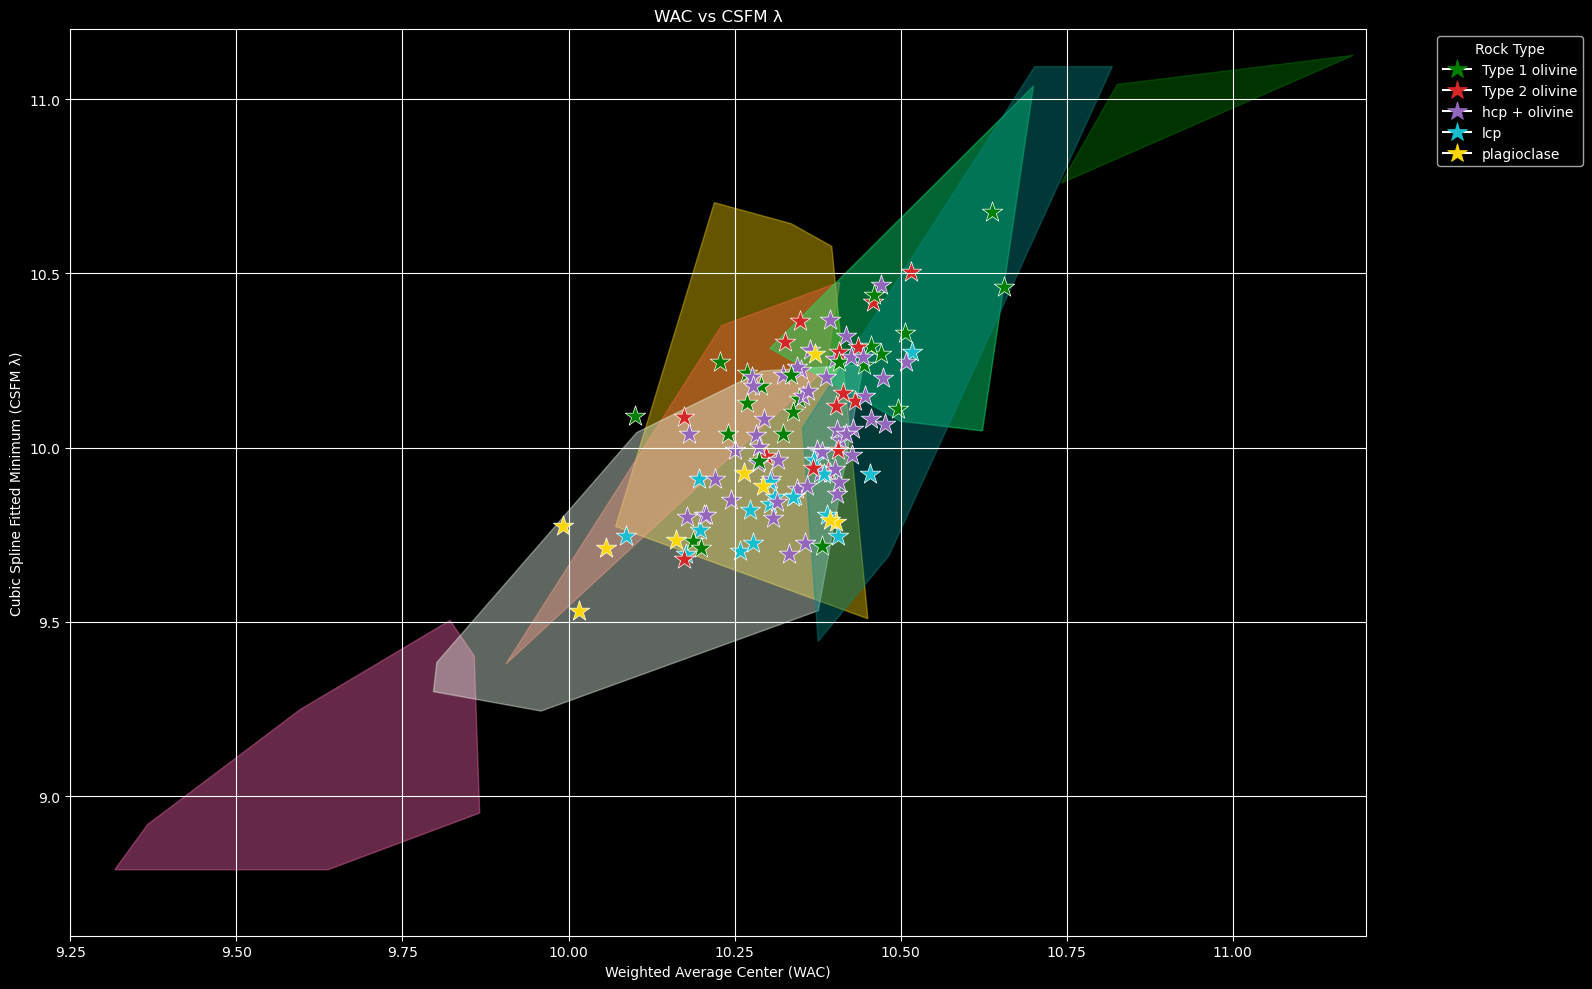

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull

plt.style.use('dark_background')

# Define category colors
cat_color = {
    'Type 1 olivine': 'green',
    'Type 2 olivine': 'tab:red',
    'hcp + olivine': 'tab:purple',
    'lcp': 'tab:cyan',
    'plagioclase': 'gold',
}

# Create a scatter plot with points colored by rock type
plt.figure(figsize=(16, 10))

# First, draw convex hull patches from the reference data
ref_categories = merged_ref_df['rock type']
ref_colors = merged_ref_df['Color']
ref_wac_values = merged_ref_df['WAC']
ref_csfm_values = merged_ref_df['CSFM λ']

# Get unique rock types from reference data
unique_rock_types_df = merged_ref_df[['rock type', 'Color']].drop_duplicates().reset_index(drop=True)

# Draw convex hull patches for each reference rock type
for _, row in unique_rock_types_df.iterrows():
    rock_type = row['rock type']
    color = row['Color']
    
    # Filter data for this rock type
    rock_data = merged_ref_df[merged_ref_df['rock type'] == rock_type]
    
    if len(rock_data) >= 3:  # Need at least 3 points for a convex hull
        # Get coordinates for this rock type
        points = np.column_stack((rock_data['WAC'], rock_data['CSFM λ']))
        
        # Calculate convex hull
        hull = ConvexHull(points)
        
        # Get hull vertices
        hull_points = points[hull.vertices]
        
        # Create polygon patch with transparency
        polygon = Polygon(hull_points, alpha=0.4, color=color, edgecolor=color, linewidth=1)
        
        # Add patch to plot
        plt.gca().add_patch(polygon)
    elif len(rock_data) == 2:
        # For 2 points, create a slightly expanded line
        x = rock_data['WAC'].values
        y = rock_data['CSFM λ'].values
        # Add some padding to make it visible
        dx = (x[1] - x[0]) * 0.05
        dy = (y[1] - y[0]) * 0.05
        expanded_x = [x[0]-dx, x[1]+dx]
        expanded_y = [y[0]-dy, y[1]+dy]
        plt.fill(expanded_x, expanded_y, color=color, alpha=0.4)

# Now plot the points from wac_df and csfm_df
# wac_df and csfm_df can be matched on Polygon Index
# Sort wac_df so that rows with 'plagioclase' in the 'Category' column are at the bottom
wac_df = wac_df.sort_values(by='Category', key=lambda col: col == 'plagioclase')
for index, wac_row in wac_df.iterrows():
    category = wac_row['Category']
    wac_value = wac_row['Updated WAC']
    
    # Find corresponding CSFM value in csfm_df
    csfm_row = csfm_df[csfm_df['Polygon Index'] == wac_row['Polygon Index']].iloc[0]
    csfm_value = csfm_row['Updated CSFM λ']
    
    # Get color from category
    color = cat_color.get(category, 'black')  # Default to black if category not in cat_color
    
    # Plot point
    plt.scatter(wac_value, csfm_value, color=color, s=240, marker='*', edgecolors='white', linewidths=0.5)

# Add legend for the new categories (make sure each appears only once)
handles = []
labels = []
for category, color in cat_color.items():
    handles.append(plt.Line2D([0], [0], marker='*', markerfacecolor=color, 
                             markersize=15, markeredgecolor=color, markeredgewidth=0.5))
    labels.append(category)

# Add a 1:1 dashed line
all_min_val = min(
    merged_ref_df['WAC'].min(),
    merged_ref_df['CSFM λ'].min(),
    wac_df['WAC'].min(),
    csfm_df['CSFM λ'].min()
)
all_max_val = max(
    merged_ref_df['WAC'].max(),
    merged_ref_df['CSFM λ'].max(),
    wac_df['WAC'].max(),
    csfm_df['CSFM λ'].max()
)

## Plot a 1:1 line for reference
# plt.plot([all_min_val, all_max_val], [all_min_val, all_max_val], '--', color='gray')

# Add legend
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='Rock Type')
plt.xlabel('Weighted Average Center (WAC)')
plt.xlim(9.25, 11.2)
plt.ylim(8.6, 11.2)
plt.ylabel('Cubic Spline Fitted Minimum (CSFM λ)')
plt.title('WAC vs CSFM λ')
plt.grid(True)
plt.tight_layout()

## Save plot as svg
# plt.savefig('/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/wac_csfm_combined_plot_with_ref_patches_updated_1to1_line.svg', format='svg', dpi=300)
# plt.savefig('/Users/phillipsm/Documents/Research/MassifMapping/Argyre_QGIS/themis_analyses/wac_csfm_combined_plot_with_ref_patches_updated.png', format='png', dpi=300)

plt.show()